In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydata = np.loadtxt(fname="data1.txt")
mydata

array([[ 1. ,  8.8,  1. ],
       [ 1. , 11. ,  1. ],
       [ 1.2, 15.9,  1. ],
       [ 3.7, 11. ,  1. ],
       [ 6.1,  8.8,  1. ],
       [ 7. , 17. ,  0. ],
       [10. ,  8.1,  0. ],
       [11. , 10.5,  0. ],
       [11.8, 17.5,  0. ],
       [16.4, 15.8,  0. ]])

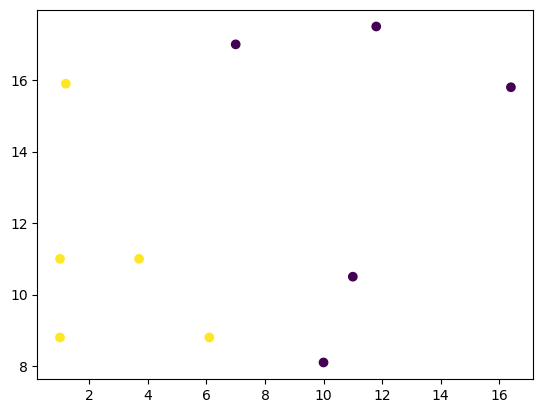

In [3]:
plt.scatter(mydata[:,0], mydata[:,1], c=mydata[:,2])

In [18]:
class kNN:
    def __init__(self,kneighbour=3):
        self.kneighbour = kneighbour
        
    def train(self, Xtrain):
        self.Xtrain = Xtrain
        plt.scatter(self.Xtrain[:,0], self.Xtrain[:,1], c=self.Xtrain[:,2])
        print("kNN has been trained")
        # this method belongs to class "parameter free methods"
    
    def predict(self, Xtest):
        #array of all distances of test point to training data
        distances = np.linalg.norm(Xtest - self.Xtrain[:,0:2], axis=1)
        print(distances)
        plt.scatter(Xtest[0],Xtest[1],s=100,c=["red"])
        #sort this array of distances
        indicesSortedDistances = np.argsort(distances)
        print(indicesSortedDistances)
        print(distances[indicesSortedDistances])
        print(self.Xtrain[indicesSortedDistances])
        
        counter = 0
        for i in self.Xtrain[indicesSortedDistances[0:self.kneighbour]]:
            counter += i[2]   ###the 2 refers to the position 2 (0, 1, 2) of the print self.Xtrain..., first row; i.e. 0.
        if counter <= self.kneighbour/2:
            print("the test data", Xtest, "belongs to class purple")
        else:
            print("the test data", Xtest, "belongs to class yellow")

kNN has been trained
[7.69675256 7.07106781 7.83900504 4.41474801 3.72155881 5.09901951
 4.3829214  3.35410197 6.68505797 9.21954446]
[7 4 6 3 5 8 1 0 2 9]
[3.35410197 3.72155881 4.3829214  4.41474801 5.09901951 6.68505797
 7.07106781 7.69675256 7.83900504 9.21954446]
[[11.  10.5  0. ]
 [ 6.1  8.8  1. ]
 [10.   8.1  0. ]
 [ 3.7 11.   1. ]
 [ 7.  17.   0. ]
 [11.8 17.5  0. ]
 [ 1.  11.   1. ]
 [ 1.   8.8  1. ]
 [ 1.2 15.9  1. ]
 [16.4 15.8  0. ]]
the test data [8.0, 12.0] belongs to class purple


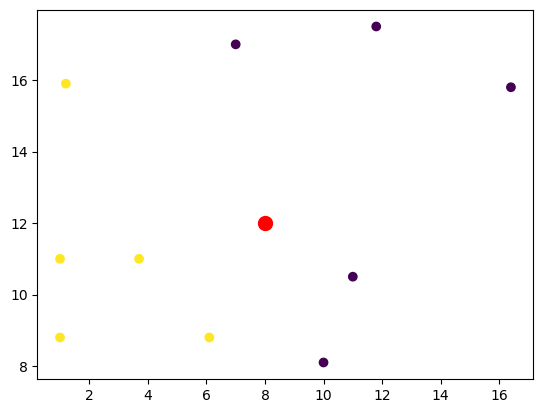

In [19]:
classifier = kNN()  ##the number within the kNN() selects how many closest neighbours (to the red dot) the model is looking at to answer whether the class is purple or yellow
classifier.train(mydata)
classifier.predict([8.0,12.0]) ##this coordinate tells the model where to split the classes in the data